In [1]:
import json
import os
import pandas as pd
import pickle
import pyarrow.parquet as pq
import re

In [30]:
from google.colab import drive
drive.mount('/content/drive')

# CELDA PARA CONECTAR DRIVE

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Yelp - Archivo check in

In [ ]:
## primero con check in
# RUTA CONNIE
#ruta_relativa= '/content/drive/MyDrive/TRABAJO FINAL GRUPO 4/Yelp/checkin.json'
#RUTA JOACO
ruta_relativa= '/content/drive/MyDrive/checkin.json'
ruta_absoluta = os.path.abspath(ruta_relativa)



In [ ]:
### LO HAGO DATAFRAME
if os.path.exists(ruta_absoluta):
    # Crear listas para almacenar los datos
    business_ids = []
    fechas_list = []

    with open(ruta_absoluta, 'r') as archivo:
        for linea in archivo:
            try:
                datos = json.loads(linea)
                # Acceder a los campos del objeto JSON
                business_id = datos['business_id']
                fechas = datos['date'].split(', ')
                # Agregar los datos a las listas
                business_ids.append(business_id)
                fechas_list.append(fechas)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON: {e}")

    # Crear un DataFrame a partir de las listas
    data = {'business_id': business_ids, 'fechas': fechas_list}
    df = pd.DataFrame(data)

    # Imprimir el DataFrame
    print(df)
else:
    print(f"El archivo {ruta_absoluta} no existe.")

                   business_id  \
0       ---kPU91CF4Lq2-WlRu9Lw   
1       --0iUa4sNDFiZFrAdIWhZQ   
2       --30_8IhuyMHbSOcNWd6DQ   
3       --7PUidqRWpRSpXebiyxTg   
4       --7jw19RH9JKXgFohspgQw   
...                        ...   
131925  zznJox6-nmXlGYNWgTDwQQ   
131926  zznZqH9CiAznbkV6fXyHWA   
131927  zzu6_r3DxBJuXcjnOYVdTw   
131928  zzw66H6hVjXQEt0Js3Mo4A   
131929  zzyx5x0Z7xXWWvWnZFuxlQ   

                                                   fechas  
0       [2020-03-13 21:10:56, 2020-06-02 22:18:06, 202...  
1       [2010-09-13 21:43:09, 2011-05-04 23:08:15, 201...  
2              [2013-06-14 23:29:17, 2014-08-13 23:20:22]  
3       [2011-02-15 17:12:00, 2011-07-28 02:46:10, 201...  
4       [2014-04-21 20:42:11, 2014-04-28 21:04:46, 201...  
...                                                   ...  
131925  [2013-03-23 16:22:47, 2013-04-07 02:03:12, 201...  
131926                              [2021-06-12 01:16:12]  
131927  [2011-05-24 01:35:13, 2012-01-01 23:44:33, 

In [ ]:
df.head(10)

,business_id,fechas
0,---kPU91CF4Lq2-WlRu9Lw,"[2020-03-13 21:10:56, 2020-06-02 22:18:06, 202..."
1,--0iUa4sNDFiZFrAdIWhZQ,"[2010-09-13 21:43:09, 2011-05-04 23:08:15, 201..."
2,--30_8IhuyMHbSOcNWd6DQ,"[2013-06-14 23:29:17, 2014-08-13 23:20:22]"
3,--7PUidqRWpRSpXebiyxTg,"[2011-02-15 17:12:00, 2011-07-28 02:46:10, 201..."
4,--7jw19RH9JKXgFohspgQw,"[2014-04-21 20:42:11, 2014-04-28 21:04:46, 201..."
5,--8IbOsAAxjKRoYsBFL-PA,"[2015-06-06 01:03:19, 2015-07-29 16:50:58, 201..."
6,--9osgUCSDUWUkoTLdvYhQ,"[2015-06-13 02:00:57, 2015-07-04 00:44:09, 201..."
7,--ARBQr1WMsTWiwOKOj-FQ,"[2014-12-12 00:44:23, 2015-01-09 00:19:52, 201..."
8,--FWWsIwxRwuw9vIMImcQg,"[2010-09-11 16:28:39, 2010-12-22 21:14:19, 201..."
9,--FcbSxK1AoEtEAxOgBaCw,"[2017-08-18 19:43:50, 2017-10-07 22:38:38, 201..."


The checkin.json file in Yelp's dataset typically contains information about the check-in activity at various businesses listed on Yelp. Each entry in this file is associated with a specific business and includes check-in data, such as timestamps representing when users checked in at that business.


The checkin.json file in Yelp's dataset typically contains information about the check-in activity at various businesses listed on Yelp. Each entry in this file is associated with a specific business and includes check-in data, such as timestamps representing when users checked in at that business.

Here's what the key components in a checkin.json file generally mean:

Business IDs: The "business_id" field in the checkin.json file is used to uniquely identify each business on Yelp. It allows you to link the check-in data to specific businesses.

Dates/Check-in Times: The dates or timestamps represent when users checked in at a particular business. These timestamps can be used to analyze patterns of user activity, such as which days and times are more popular for check-ins at specific businesses.

By analyzing the check-in data, you can gain insights into the following:

Peak Hours: You can determine the busiest days and times for each business. For example, you might find that a restaurant is busiest during dinner hours or on weekends.

Seasonal Trends: Check-in data can reveal seasonal trends, such as increased check-ins during holidays or specific events.

User Engagement: It provides an indication of user engagement with businesses. More check-ins might suggest a popular and active establishment.

Marketing Insights: Businesses can use this data to tailor their marketing efforts, promotions, and operational hours to align with when users are most likely to visit.

Recommendations: User check-in data can be used to make personalized recommendations for other users based on their check-in history and preferences.

Overall, the checkin.json file in Yelp's dataset is valuable for businesses and data analysts to understand user behavior and engagement patterns at different establishments, which can inform decision-making and marketing strategies.

# Yelp - Archivo reviews

In [ ]:
### dsp con REVIEW
ruta_relativa2= '/content/drive/MyDrive/review.json'
# '/content/drive/MyDrive/TRABAJO FINAL GRUPO 4/Yelp/checkin.json' RUTA CONNIE
# '/content/drive/MyDrive/review.json' RUTA JOACO

ruta_absoluta2 = os.path.abspath(ruta_relativa2)

In [ ]:
### LO HAGO DATAFRAME
if os.path.exists(ruta_absoluta2):
    # Crear listas para almacenar los datos

    review_id=[]
    user_id = []
    busines_id = []
    starslist=[]
    datelist=[]
    testlist=[]
    uselist=[]
    funlist=[]
    coolist=[]


    with open(ruta_absoluta2, 'r') as archivo:
        for linea in archivo:
            try:
                datos = json.loads(linea)
                # Acceder a los campos del objeto JSON
                review= datos['review_id']
                user= datos['user_id']
                busines= datos['business_id']
                stars=datos['stars']
                date=datos['date']
                test=datos['text']
                use=datos['useful']
                fun=datos['funny']
                cool=datos['cool']
                # Agregar los datos a las listas

                review_id.append(review)
                user_id.append(user)
                busines_id.append(busines)
                starslist.append(stars)
                datelist.append(date)
                testlist.append(test)
                uselist.append(use)
                funlist.append(fun)
                coolist.append(cool)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON: {e}")

    # Crear un DataFrame a partir de las listas
    data2 = {'review_id':review_id,'user_id':user_id, 'business_id': busines_id, 'stars': starslist, 'date': datelist, 'text':testlist, 'useful':uselist, 'funny':funlist, 'cool':coolist}
    df2 = pd.DataFrame(data2)

    # Imprimir el DataFrame
    print(df2)
else:
    print(f"El archivo {ruta_absoluta2} no existe.")

                      review_id                 user_id  \
0        KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA   
1        BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q   
2        saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A   
3        AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
4        Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ   
...                         ...                     ...   
6990275  H0RIamZu0B0Ei0P4aeh3sQ  qskILQ3k0I_qcCMI-k6_QQ   
6990276  shTPgbgdwTHSuU67mGCmZQ  Zo0th2m8Ez4gLSbHftiQvg   
6990277  YNfNhgZlaaCO5Q_YJR4rEw  mm6E4FbCMwJmb7kPDZ5v2Q   
6990278  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   
6990279  RwcKOdEuLRHNJe4M9-qpqg  6JehEvdoCvZPJ_XIxnzIIw   

                    business_id  stars                 date  \
0        XQfwVwDr-v0ZS3_CbbE5Xw    3.0  2018-07-07 22:09:11   
1        7ATYjTIgM3jUlt4UM3IypQ    5.0  2012-01-03 15:28:18   
2        YjUWPpI6HXG530lwP-fb2A    3.0  2014-02-05 20:30:30   
3        kxX2SOes4o-D3ZQBkiMRfA    5.0 

In [ ]:
df2.head(10)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is...",0,0,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...,1,0,1
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...,0,0,0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo...",1,0,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,2017-01-14 20:54:15,Cute interior and owner (?) gave us tour of up...,1,0,1
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,2015-09-23 23:10:31,I am a long term frequent customer of this est...,1,2,1
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,2015-01-03 23:21:18,Loved this tour! I grabbed a groupon and the p...,0,2,0
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2015-08-07 02:29:16,Amazingly amazing wings and homemade bleu chee...,2,0,0
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,2016-03-30 22:46:33,This easter instead of going to Lopez Lake we ...,1,1,0
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,2016-07-25 07:31:06,Had a party of 6 here for hibachi. Our waitres...,0,0,0


In [ ]:
# Vista de cantidad de datos en el df
df2.shape

(6990280, 9)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   date         object 
 5   text         object 
 6   useful       int64  
 7   funny        int64  
 8   cool         int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [ ]:
# No hay nulos

df2.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [ ]:
# de todos los datos hay casi 2m de usuarios, es decir que al menos cada usuario emitio 3 reviews aprox
df2.user_id.nunique()

1987929

In [ ]:
# Valores unicos por business. 150346 businesses unicos
df2.business_id.nunique()

150346

In [ ]:
# El maximo de reviews para un lugar es de 7673 y el minimo 5 reviews
review_counts = df2.groupby('business_id')['review_id'].count().reset_index()
review_counts.sort_values(by = "review_id")

,business_id,review_id
80419,XHG8JXyUm4MgmrZ4BhqNdw,5
134824,tUpS1ztCfz7Q13-ZL-lCIQ,5
17736,6SFjEtUtLqZwd8bsMW71lQ,5
134826,tUr7rlfUGwrFVEiNulJXrQ,5
134827,tUrh1N3cIQmBf3TyVQ91mg,5
...,...,...
122423,oBNrLz4EDhiscSlbOl8uAw,5264
147782,ytynqOUb3hjKeJfRj5Tshw,5778
41309,GXFMD0Z4jEVZBCsbPf4CTQ,6160
90484,ac1AeYqs8Z4_e2X5M3if2A,7516


In [ ]:
# Podriamos hacer un filtro que por ejemplo, para que la review sea valida tenga una cantidad mayor a x reviews y asi reducimos el df
review_counts[review_counts["review_id"]<20]

,business_id,review_id
1,--0iUa4sNDFiZFrAdIWhZQ,14
2,--30_8IhuyMHbSOcNWd6DQ,9
3,--7PUidqRWpRSpXebiyxTg,12
4,--7jw19RH9JKXgFohspgQw,13
8,--FWWsIwxRwuw9vIMImcQg,8
...,...,...
150341,zznZqH9CiAznbkV6fXyHWA,12
150342,zztOG2cKm87I6Iw_tleZsQ,6
150343,zzu6_r3DxBJuXcjnOYVdTw,8
150344,zzw66H6hVjXQEt0Js3Mo4A,5


In [ ]:
# Conteo de la distribucion de estrellas otorgadas a los businesses

df2.stars.value_counts()

5.0    3231627
4.0    1452918
1.0    1069561
3.0     691934
2.0     544240
Name: stars, dtype: int64

In [ ]:
# Ver como se distribuyen las clasificaciones de los reviews.
df2.pivot_table(index='business_id', columns='stars', values='review_id', aggfunc='count', fill_value=0)



stars,1.0,2.0,3.0,4.0,5.0
business_id,,,,,
---kPU91CF4Lq2-WlRu9Lw,1,0,2,4,17
--0iUa4sNDFiZFrAdIWhZQ,3,0,4,5,2
--30_8IhuyMHbSOcNWd6DQ,3,0,0,1,5
--7PUidqRWpRSpXebiyxTg,7,2,2,1,0
--7jw19RH9JKXgFohspgQw,2,0,1,0,10
...,...,...,...,...,...
zznZqH9CiAznbkV6fXyHWA,0,0,0,1,11
zztOG2cKm87I6Iw_tleZsQ,0,0,0,1,5
zzu6_r3DxBJuXcjnOYVdTw,0,1,2,4,1


In [ ]:
df2.date.max()

'2022-01-19 19:48:45'

In [ ]:
df2.date.min()

# Tenemos 17 años de review considerando los rangos de fecha

'2005-02-16 03:23:22'

In [ ]:
df2.text.head(10)
# Aca NLP o ver que podriamos sacar de estos textos

0    If you decide to eat here, just be aware it is...
1    I've taken a lot of spin classes over the year...
2    Family diner. Had the buffet. Eclectic assortm...
3    Wow!  Yummy, different,  delicious.   Our favo...
4    Cute interior and owner (?) gave us tour of up...
5    I am a long term frequent customer of this est...
6    Loved this tour! I grabbed a groupon and the p...
7    Amazingly amazing wings and homemade bleu chee...
8    This easter instead of going to Lopez Lake we ...
9    Had a party of 6 here for hibachi. Our waitres...
Name: text, dtype: object

In [ ]:
df2["useful"].unique()

array([   0,    1,    2,    4,    3,    7,   15,    5,   14,    6,   11,
         13,    8,    9,   10,   12,   16,   23,   18,   19,   34,   17,
         20,   61,   31,   91,   54,   21,   22,   28,   32,   25,   29,
         48,   33,   27,   46,   24,  171,   30,   44,   26,   70,   42,
         40,   39,   35,   38,  320,   41,   45,   37,   75,   36,   53,
         74,   49,   60,   43,   51,   52,   63,   58,  131,   55,  175,
         47,   56,   72,  305,  112,   71,   68,   69,  179,  124,   50,
         73,   66,   57,   65,  121,   82,  135,  132,   87,   98,   93,
        118,  539,  163,   79,  150,  102,   59,   89,  142,   64,   96,
         78,   86,   92,  109,  100,  120,  151,   77,  110,  111,  160,
         84,   80,   62,  114,  346,  152,  190,  123,  115,   81,  217,
        199,  197,   85,  149,  166,  105,  168,  169,   88,  292,  146,
         76,  225,  176,  144,  127,  126,  143,  177,  129,  187,   95,
        106,  148,  153,  156,  103,  137,  182,   

In [ ]:
# sorted(df2["useful"].unique())
df2["useful"].unique().max()

1182

In [ ]:

df2["useful"].unique().min()

-1

In Yelp reviews, the "useful" score is one of the three types of votes or feedback that users can give to a review to indicate its helpfulness. The three types of votes typically found on Yelp are:

Useful: Users can mark a review as "useful" if they find it informative or helpful. This is often used to highlight reviews that provide valuable information about a business, product, or service.

Funny: Users can mark a review as "funny" if they found it amusing or entertaining. This is typically used for reviews that have a humorous tone or anecdotal content.

Cool: Users can mark a review as "cool" if they think it's well-written, interesting, or otherwise noteworthy. It's a more general category for positive feedback.

Podes meterte en la pagina y darle como like o aprobacion a cada uno de los scores a estas reviews, lo cual si mucha gente lo vota es porque hay una mayoria que esta de acuerdo en si una review fue util, fue divertida y copada. Es decir que las reviews con alto score, son muy aprobadas por los usuarios


In [ ]:
df2["funny"].unique()

array([  0,   2,   1,   5,   3,   4,   6,  12,  19,   9,   7,  10,  11,
        13,  26,   8,  25,  18,  15,  21,  16,  14,  24,  17,  22,  20,
        38,  27,  23,  98,  30,  32,  28,  39,  76,  33,  40,  44, 222,
       284,  46,  42,  34,  29,  37,  41,  88,  35,  48,  43,  54,  45,
        52,  58,  31,  68,  67,  65, 123,  62, 113, 242,  61,  57,  47,
        80,  53,  85,  75, 141,  36,  97, 105,  79,  78,  74, 133,  93,
       100,  71, 254,  63, 132,  49, 126,  83,  86,  81,  59,  55,  92,
        72, 101, 103,  50,  73,  91, 129, 130, 109,  82,  56, 107,  60,
        94, 114, 139, 110,  69, 169, 251, 200,  64, 143, 181, 179, 190,
       175, 277, 127, 167, 135, 256, 146, 112,  77, 152, 144, 235,  95,
       228, 240,  84,  99, 232,  89, 106, 202, 236, 116,  51,  87,  66,
       134, 283, 191, 117,  -1, 102, 131,  90, 104, 157, 155,  70, 159,
       150, 201, 121, 119, 227,  96, 266, 324, 154, 148, 180, 361, 241,
       326, 310, 287, 278, 332, 182, 307, 336, 342, 345, 341, 14

In [ ]:
df2["funny"].max()

792

In [ ]:
df2["funny"].min()

-1

In [ ]:
df2["cool"].unique()

array([  0,   1,   2,   3,   4,   9,   5,   6,   7,   8,  12,  11,  13,
        10,  44,  15,  14,  32,  17,  19,  23,  21,  26,  22,  27,  29,
        25,  49,  31,  16,  33,  24,  18,  41,  42,  20,  37,  35,  45,
        28,  63,  79,  30,  48,  43,  40,  52,  47,  34,  46,  38,  36,
       164,  70,  59,  39,  73,  75,  50,  61,  94,  74, 130,  58,  87,
        88,  56, 121,  53, 146,  60,  64,  51,  82, 142,  97,  66,  67,
        62,  77,  86,  89,  54,  83,  95, 125, 153, 105, 118, 111,  68,
       139, 109,  85,  80,  76,  55, 122, 145,  91, 152, 132,  99, 155,
        93, 140,  81,  92, 172, 123, 112, 106, 102,  69, 174, 201,  65,
        98, 120, 165, 114, 176, 141,  84, 151,  72, 147, 116,  57, 156,
       115, 149, 183, 117, 101, 158, 126, 113, 195, 104, 162, 103,  90,
        71,  78, 107, 136, 138, 110, 129, 127, 148,  -1, 154, 144,  96,
       159, 202, 157, 119, 196, 100, 185, 150, 124, 143, 137, 207, 169,
       134, 173, 128, 261, 131, 175, 108, 133, 205, 163, 359, 36

In [ ]:
df2["cool"].max()

404

In [ ]:
df2["cool"].min()

-1

# Yelp - Archivo businesses

In [ ]:
## BUSINES
# Ruta relativa al archivo .pkl
# RUTA CONNIE
#ruta_relativa3 = "/content/drive/MyDrive/TRABAJO FINAL GRUPO 4/Yelp/business.pkl"
#RUTA JOACO
ruta_relativa3 = '/content/drive/MyDrive/business.pkl'
# Obtener la ruta absoluta al archivo .pkl
ruta_absoluta3 = os.path.abspath(ruta_relativa3)



In [ ]:
df_businesses = pd.read_pickle(ruta_relativa3)

In [ ]:

df_businesses.shape

(150346, 28)

In [ ]:
if os.path.exists(ruta_absoluta3):
    # Cargar el archivo .pkl en un DataFrame
    with open(ruta_absoluta3, 'rb') as archivo:
        df3 = pickle.load(archivo)

    # Ahora puedes trabajar con el DataFrame df
    print(df3)
else:
    print(f"El archivo {ruta_absoluta3} no existe.")



                   business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara   NaN       93101   
1       87 Grasso Plaza Shopping Center         Affton   NaN       63123   
2                  5255 E Broadway Blvd         Tuc

In [ ]:
df_businesses.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,PA,63144,38.627695,-90.340465,2.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,PA,33707,27.76659,-82.732983,3.5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,TN,63123,38.565165,-90.321087,3.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.76817,1.5,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_businesses.columns
# estan duplicadas las columnas, tienen 14, o sera normal est caso, me llamo la atencion

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
# Drop duplicate columns
df_businesses = df_businesses.loc[:, ~df_businesses.columns.duplicated()]

In [ ]:
# ok
df_businesses.shape

(150346, 14)

In [ ]:
# unique states
df_businesses.state.unique()

array([nan, 'CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV',
       'ID', 'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT',
       'MI', 'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

In [ ]:
df_businesses.state.value_counts()

PA     34039
FL     26329
TN     12056
IN     11246
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2144
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: state, dtype: int64

In [ ]:
# Arreglo los nan de state
df_businesses.state.isnull().sum()
df_businesses[df_businesses.state.isnull()]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [ ]:
df_businesses.loc[df_businesses['city'] == 'Santa Barbara', 'state'] = 'CA'
df_businesses.loc[df_businesses['city'] == 'Affton', 'state'] = 'MO'
df_businesses.loc[df_businesses['city'] == 'Tucson', 'state'] = 'AZ'


In [ ]:
df_businesses.state.isnull().sum()

0

In [ ]:
### sera real tantos nulos??? o es por la forma de subirlo que hay algun error??????
df_businesses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150346 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [ ]:
df_businesses_florida = df_businesses[df_businesses["state"]=="FL"]
df_businesses_florida

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.45738,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3..."
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': 'True'},"General Dentistry, Dentists, Health & Medical,...","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,FL,70118,29.941468,-90.129953,4.0,5,1,"{'BusinessParking': '{'garage': False, 'street...","Vape Shops, Tobacco Shops, Personal Shopping, ...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
53,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL,T5H 3B2,53.549633,-113.50878,5.0,20,0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150281,yqwqLm27A0mxmBx_chTZhg,RadioShack,1305 W Chester Pike,Havertown,FL,19083,39.974556,-75.321163,2.5,5,0,"{'BusinessParking': '{'garage': False, 'street...","Hobby Shops, Shopping, Electronics, Mobile Phones","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ..."
150283,Y5gyxnQt44B3axgzrjttlw,Don Cruz Snowballs,4213 Williams Blvd,Kenner,FL,70065,30.033566,-90.23852,4.5,6,1,"{'RestaurantsTakeOut': 'True', 'DogsAllowed': ...","Mexican, Shaved Ice, Restaurants, Food, Food S...","{'Monday': '14:0-21:0', 'Tuesday': '14:0-21:0'..."
150292,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,27.770872,-82.643069,4.5,38,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:..."
150295,jsTHopAoQFncD0pGoJQFrw,St John Neumann Center for Rehabilitation & He...,10400 Roosevelt Blvd,Philadelphia,FL,19116,40.098009,-75.012998,1.5,6,1,None,"Retirement Homes, Health & Medical, Hospice, R...",None


# Yelp - Archivo TIP

In [ ]:
### TIP
#RUTA CONNIE
#ruta_relativa4= '/content/drive/MyDrive/TRABAJO FINAL GRUPO 4/Yelp/tip.json'
#RUTA JOACO
ruta_relativa4 = '/content/drive/MyDrive/tip.json'

ruta_absoluta4 = os.path.abspath(ruta_relativa4)

In [ ]:
### LO HAGO DATAFRAME
if os.path.exists(ruta_absoluta4):
    # Crear listas para almacenar los datos
    textlist = []
    datelist = []
    puntaje= []
    businesidlist=[]
    userlist=[]


    with open(ruta_absoluta4, 'r') as archivo:
        for linea in archivo:
            try:
                datos = json.loads(linea)
                # Acceder a los campos del objeto JSON
                text = datos['text']
                date = datos['date']
                points = datos['compliment_count']
                business_id = datos['business_id']
                user= datos['user_id']
                # Agregar los datos a las listas
                textlist.append(text)
                datelist.append(date)
                puntaje.append(points)
                businesidlist.append(business_id)
                userlist.append(user)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON: {e}")

    # Crear un DataFrame a partir de las listas
    data = {'text': textlist,'date': datelist,'compliment_count': puntaje,'business_id': businesidlist, 'user_id': userlist}
    df4 = pd.DataFrame(data)

    # Imprimir el DataFrame
    print(df4)
else:
    print(f"El archivo {ruta_absoluta4} no existe.")

                                                     text  \
0                          Avengers time with the ladies.   
1       They have lots of good deserts and tasty cuban...   
2                  It's open even when you think it isn't   
3                               Very decent fried chicken   
4                  Appetizers.. platter special for lunch   
...                                                   ...   
908910              Disappointed in one of your managers.   
908911                            Great food and service.   
908912                                Love their Cubans!!   
908913                            Great pizza great price   
908914                  Food is good value but a bit hot!   

                       date  compliment_count             business_id  \
0       2012-05-18 02:17:21                 0  3uLgwr0qeCNMjKenHJwPGQ   
1       2013-02-05 18:35:10                 0  QoezRbYQncpRqyrLH6Iqjg   
2       2013-08-18 00:56:08                 0  M

In [ ]:
df4.head(10)

,text,date,compliment_count,business_id,user_id
0,Avengers time with the ladies.,2012-05-18 02:17:21,0,3uLgwr0qeCNMjKenHJwPGQ,AGNUgVwnZUey3gcPCJ76iw
1,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0,QoezRbYQncpRqyrLH6Iqjg,NBN4MgHP9D3cw--SnauTkA
2,It's open even when you think it isn't,2013-08-18 00:56:08,0,MYoRNLb5chwjQe3c_k37Gg,-copOvldyKh1qr-vzkDEvw
3,Very decent fried chicken,2017-06-27 23:05:38,0,hV-bABTK-glh5wj31ps_Jw,FjMQVZjSqY8syIO-53KFKw
4,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0,_uN0OudeJ3Zl_tf6nxg5ww,ld0AperBXk1h6UbqmM80zw
5,"Chili Cup + Single Cheeseburger with onion, pi...",2012-03-13 04:00:52,0,7Rm9Ba50bw23KTA8RedZYg,trf3Qcz8qvCDKXiTgjUcEg
6,"Saturday, Dec 7th 2013, ride Patco's Silver Sl...",2013-12-03 23:42:15,0,kH-0iXqkL7b8UXNpguBMKg,SMGAlRjyfuYu-c-22zIyOg
7,This is probably the best place in the cool Sp...,2016-11-22 22:14:58,0,jtri188kuhe_AuEOJ51U_A,YVBB9g23nuVJ0u44zK0pSA
8,Tacos,2012-07-27 01:48:24,0,xODBZmX4EmlVvbqtKN7YKg,VL12EhEdT4OWqGq0nIqkzw
9,Starbucks substitute in boring downtown Tampa....,2012-06-09 22:57:04,0,pICJRcyqW1cF96Q3XhLSbw,4ay-fdVks5WMerYL_htkGQ


# YELP -Archivo User

In [ ]:
##ahora con el archivo parquet.USER

# Ruta relativa al archivo Parquet
# RUTA CONNIE
#ruta_relativa5 = "/content/drive/MyDrive/TRABAJO FINAL GRUPO 4/Yelp/user.parquet"
#RUTA JOACO
ruta_relativa5 = '/content/drive/MyDrive/user.parquet'

# Obtener la ruta absoluta al archivo Parquet
ruta_absoluta5 = os.path.abspath(ruta_relativa5)

# Verificar si el archivo existe
if os.path.exists(ruta_absoluta5):
    # Cargar el archivo Parquet en un DataFrame
    df5 = pd.read_parquet(ruta_absoluta5)

    # Ahora puedes trabajar con el DataFrame df
    print(df5)
else:
    print(f"El archivo {ruta_absoluta5} no existe.")

NameError: ignored

In [ ]:
df5.head(10)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
5,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
6,cxuxXkcihfCbqt5Byrup8Q,Rob,12,2009-02-24 03:09:06,6,1,0,,"HDAQ74AEznP-YsMk1B14CA, 6A6-aIX7fg_zRy9MiE6YyQ...",1,...,0,0,0,0,0,1,0,0,0,0
7,E9kcWJdJUHuTKfQurPljwA,Mike,358,2008-12-11 22:11:56,399,102,143,,"y2GyxJF5VQWohxgw_GR7Jw, 0NRn4eY3JWN0IFqvOSa5gA...",23,...,7,2,0,0,8,6,12,12,5,0
8,lO1iq-f75hnPNZkTy3Zerg,Rachelle,40,2008-12-29 22:40:56,109,40,46,,"tOQDlz36rI__SOsbL-HCag, 83Xb0PPBwZiG2c_fLpZgAw...",7,...,0,0,3,0,3,4,5,5,3,1
9,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,,"gy5fWeSv3Gamuq9Ox4MV4g, lMr3LWU6kPFLTmCpDkACxg...",4,...,0,0,0,0,1,6,3,3,0,0


In [ ]:
df5.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [ ]:
df5.shape

(2105597, 22)

In [ ]:
df5.user_id.nunique()

1987897

# Juntar data de Florida

In [ ]:
# Business check in - Florida businesses info

check_in_con_info = pd.merge(df, df_businesses_florida, on='business_id', how='inner', suffixes=('_left', '_right'))
check_in_con_info

,business_id,fechas,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,---kPU91CF4Lq2-WlRu9Lw,"[2020-03-13 21:10:56, 2020-06-02 22:18:06, 202...",Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True...","Seafood, Restaurants, Latin American, Food, Fo...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
1,--epgcb7xHGuJ-4PUeSLAw,"[2010-10-01 16:31:41, 2010-12-16 19:13:47, 201...",Manhattan Bagel,200 York Road,Willow Grove,FL,19090,40.145054,-75.116293,3.0,34,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Restaurants, Food, Bagels, Sandwiches, Breakfa...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
2,--pDYWb4DzqKdAdrPcxuaA,"[2013-03-25 19:29:51, 2013-05-31 23:45:58, 201...",First Flight Wine Bar,Tampa International Airport,Tampa,FL,33604,28.014218,-82.416346,4.0,13,1,"{'NoiseLevel': ''average'', 'BikeParking': 'Fa...","Wine Bars, Nightlife, Bars",None
3,--rS-rnOIZxoiDA8yctWpQ,"[2021-08-21 15:16:06, 2021-08-30 01:04:13, 202...",Publix GreenWise Market,555 Channelside Dr,Tampa,FL,33602,27.943291,-82.45016,5.0,8,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Organic Stores, Food, Grocery, Shopping, Publi...","{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ..."
4,--seHXaJfDtWbmFSxkzaRg,"[2010-07-19 20:40:19, 2012-04-10 19:27:06]",Collingswood Dental Associates,610 Collings Ave,Collingswood,FL,08107,39.910771,-75.084177,5.0,5,1,{'ByAppointmentOnly': 'True'},"Health & Medical, Periodontists, Dentists, Cos...","{'Monday': '9:30-17:30', 'Tuesday': '8:30-19:3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21222,zymvTQ12tRy3bzmP4tPgOg,"[2019-04-20 17:50:43, 2019-04-22 22:20:51, 201...",Salt + Smoke,501 S Main St,Saint Charles,FL,63301,38.777849,-90.483287,4.0,368,1,"{'Caters': 'True', 'RestaurantsTakeOut': 'True...","Beer Bar, Sandwiches, Bars, Barbeque, Restaura...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
21223,zynDyrQvFZfbf5m4_Usl5g,"[2019-12-14 16:31:44, 2020-01-24 14:02:24, 202...",Smoke Sum,926 Canal St,New Orleans,FL,70112,29.954541,-90.071783,2.0,8,1,"{'WheelchairAccessible': 'True', 'BikeParking'...","Shopping, Tobacco Shops, Vape Shops, Head Shops","{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'..."
21224,zzIF9qp2UoHN48EeZH_IDg,"[2013-07-15 01:36:36, 2016-02-19 23:31:08, 201...",Domino's Pizza,40188 US Hwy 19 N,Tarpon Springs,FL,34689,28.137368,-82.740846,3.0,19,1,"{'RestaurantsReservations': 'False', 'Ambience...","Italian, Restaurants, Pizza, Chicken Wings, Sa...","{'Monday': '10:30-1:0', 'Tuesday': '10:30-1:0'..."
21225,zzg-Il9zxsaVXlCDrcG7hg,"[2015-03-28 17:22:29, 2015-05-16 20:10:42, 201...",North End Organic Nursery,3777 W Chinden Blvd,Garden City,FL,83714,43.62589,-116.244516,5.0,16,1,"{'BusinessParking': '{'garage': False, 'street...","Home & Garden, Shopping, Nurseries & Gardening","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."


In [ ]:
# Business reviews - Florida businesses info

reviews_con_info = pd.merge(df2, df_businesses_florida, on='business_id', how='inner', suffixes=('_left', '_right'))
reviews_con_info

,review_id,user_id,business_id,stars_left,date,text,useful,funny,cool,name,...,state,postal_code,latitude,longitude,stars_right,review_count,is_open,attributes,categories,hours
0,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2015-08-07 02:29:16,Amazingly amazing wings and homemade bleu chee...,2,0,0,Fries Rebellion,...,FL,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
1,TP0HYy4GqYtrWMlFIhxw3A,YRsNXrlyvjnr7NLSDwen0Q,LHSTtnW3YHCeUkRDGyJOyw,1.0,2016-05-31 01:58:22,We arrived a few minutes early for a 7pm reser...,4,2,0,Fries Rebellion,...,FL,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
2,RkXe6gzU6bfut_Q2W2NpbA,jPaGpFevnH4y1BQGIe3glw,LHSTtnW3YHCeUkRDGyJOyw,5.0,2017-12-02 23:28:30,This is one of my favorite restaurants. They h...,0,0,0,Fries Rebellion,...,FL,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
3,Wv6ty8iRgaPtqRzQXQiDaA,V0RkSHN5nckzO6oPTCp6mw,LHSTtnW3YHCeUkRDGyJOyw,4.0,2018-03-23 23:22:00,Let me start by saying that my wife and I are ...,0,0,0,Fries Rebellion,...,FL,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
4,w0cb9xwH5KSgtTpP3DcIVg,yujZWE_uZn41f5-677Gvjg,LHSTtnW3YHCeUkRDGyJOyw,4.0,2016-01-30 15:55:07,I wrote this a while ago but never posted it f...,1,0,0,Fries Rebellion,...,FL,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106236,Rua2-9R0jNk2sAN6JdM43g,n9B9grVJBm0nSvKj0wTBNw,NSoT9z12S2wgJsZR-jfLRA,1.0,2022-01-14 22:39:21,My package has been stuck in transit since Jan...,1,0,0,Uni Express,...,FL,T6N 1A8,53.460689,-113.487948,3.5,7,1,None,"Local Services, Couriers & Delivery Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
1106237,to_ufQVO5UcKGEMsD1v8pw,OGey37DSAw5z6LLqafSt5A,NSoT9z12S2wgJsZR-jfLRA,1.0,2021-07-08 21:15:32,I paid for an order to Shein on May 28th. (NOT...,1,0,0,Uni Express,...,FL,T6N 1A8,53.460689,-113.487948,3.5,7,1,None,"Local Services, Couriers & Delivery Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
1106238,09Q32HZZf2_vJFnyHtYouQ,agyJKcnXp4PF9QBfCAKfXA,NSoT9z12S2wgJsZR-jfLRA,5.0,2022-01-15 20:02:35,l A very nice driver. When I was on vacation a...,1,0,0,Uni Express,...,FL,T6N 1A8,53.460689,-113.487948,3.5,7,1,None,"Local Services, Couriers & Delivery Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
1106239,1WYnufgEcMknv_wGI6zmCg,OGey37DSAw5z6LLqafSt5A,NSoT9z12S2wgJsZR-jfLRA,5.0,2021-07-14 04:57:51,Literally like 20 minutes after i wrote a bunc...,3,1,1,Uni Express,...,FL,T6N 1A8,53.460689,-113.487948,3.5,7,1,None,"Local Services, Couriers & Delivery Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."


In [ ]:
# TIP CON INFO


TIP_con_info = pd.merge(df4, df_businesses_florida, on='business_id', how='inner', suffixes=('_left', '_right'))
TIP_con_info


,text,date,compliment_count,business_id,user_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0,QoezRbYQncpRqyrLH6Iqjg,NBN4MgHP9D3cw--SnauTkA,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', ..."
1,Turkey and roast beef,2012-10-11 13:04:02,0,QoezRbYQncpRqyrLH6Iqjg,DWryovIM4VF2vim4p6WYaw,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', ..."
2,Coffee and baby bread,2012-10-24 12:37:05,0,QoezRbYQncpRqyrLH6Iqjg,DWryovIM4VF2vim4p6WYaw,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', ..."
3,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40,0,QoezRbYQncpRqyrLH6Iqjg,boRCdL8ez95KwzWe69VoUg,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', ..."
4,My last time. Continental and a Cuban,2012-11-09 18:51:34,0,QoezRbYQncpRqyrLH6Iqjg,DWryovIM4VF2vim4p6WYaw,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146550,Avoid giving any of your hard earned money to ...,2019-12-09 17:02:59,0,MtFOOKu3JXClmUEDOCQKFA,Pq4QPhMlCnnqaV2qHRxCAQ,Cherry Hill Programs,"4 E Stow Rd, Ste 1",Marlton,FL,08053,39.912606,-74.93051,1.0,64,1,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Flowers & Gifts, Shopping Centers, Photographe...",None
146551,Do not go here.,2020-01-11 05:15:09,0,AcLpmxOw1oWlSauNTdZYZA,8sEgbyJpSW6V53-NrBCC-A,AT&T Store,1831 Manhattan Blvd,Harvey,FL,70058,29.887346,-90.055146,3.0,10,1,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Local Services, Mobile Phone Accessories, Mobi...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
146552,Great job and timely responses,2021-04-18 02:14:10,0,WnGA31QM-srnNrXHLc81dQ,hN-i9S5J4gCRM8sKAh-Eyw,Spökhund Cleaning,,Nashville,FL,37209,36.158887,-86.782056,5.0,8,1,"{'BusinessAcceptsBitcoin': 'False', 'BusinessA...","Window Washing, Carpet Cleaning, Local Service...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
146553,Beth you're the BEST!!!,2017-03-31 05:28:02,0,VEsb_ByMJkuCEDURgfLBDg,2dILt0X5cpNb8reAxVXMyA,Lilibeth Salon Hair & Makeup,"1485 E Valley Rd, Ste 10 - 50601",Montecito,FL,93108,34.436552,-119.633196,4.5,23,1,"{'WheelchairAccessible': 'False', 'BikeParking...","Nail Salons, Hair Salons, Waxing, Beauty & Spa...",{'Thursday': '10:0-12:0'}



# Lectura archivo fausto

In [2]:
ruta_absoluta6 = 'C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF\Proyecto_Final/florida_points.parquet'


# Obtener la ruta absoluta al archivo Parquet
ruta_absoluta6 = os.path.abspath(ruta_absoluta6)

# Verificar si el archivo existe
if os.path.exists(ruta_absoluta6):
    # Cargar el archivo Parquet en un DataFrame
    df6 = pd.read_parquet(ruta_absoluta6)

    # Ahora puedes trabajar con el DataFrame df
    print(df6)
else:
    print(f"El archivo {ruta_absoluta6} no existe.")

              user_id               name_x           time  rating  \
2056     1.130683e+20        Edwin Ashurst  1537195868022       5   
2057     1.130683e+20        Edwin Ashurst  1537195868022       5   
2058     1.059416e+20      Douglas Gummere  1537402367631       1   
2059     1.059416e+20      Douglas Gummere  1537402367631       1   
2060     1.098577e+20         David Powell  1534936396392       5   
...               ...                  ...            ...     ...   
2866445  1.178976e+20      Migda Rodriguez  1560944466110       5   
2866446  1.157899e+20       Jey Candelario  1562271537847       2   
2866447  1.086188e+20          Сергей Серп  1554053232647       5   
2866448  1.147855e+20        Jamie Jackson  1561156904005       5   
2866449  1.112114e+20  Gerardo carrasquero  1567770353851       5   

                                                      text  pics  \
2056     The salads were lackluster though with well wr...  None   
2057     The salads were lackluster

In [3]:
df6.shape

(616160, 23)

In [4]:
df6.columns

Index(['user_id', 'name_x', 'time', 'rating', 'text', 'pics', 'resp',
       'gmap_id', 'name_y', 'address', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url', 'geometry'],
      dtype='object')

In [5]:
df6.state.unique()

array(['Permanently closed', 'Closed ⋅ Opens 6PM', None,
       'Closed ⋅ Opens 9AM Thu', 'Temporarily closed',
       'Open ⋅ Closes 11PM', 'Open ⋅ Closes 10PM',
       'Closed ⋅ Opens 7:30AM Thu', 'Closes soon ⋅ 2:30PM ⋅ Reopens 5PM',
       'Closed ⋅ Opens 3PM', 'Closed ⋅ Opens 9AM', 'Closed ⋅ Opens 4PM',
       'Open 24 hours', 'Closed ⋅ Opens 7AM Wed',
       'Closed ⋅ Opens 2PM Wed', 'Closed ⋅ Opens 11AM Wed',
       'Closed ⋅ Opens 10:30AM Wed', 'Closed ⋅ Opens 11AM Thu',
       'Closed ⋅ Opens 6:30AM', 'Closed ⋅ Opens 12PM',
       'Closed ⋅ Opens 8AM Tue', 'Open ⋅ Closes 2AM',
       'Closed ⋅ Opens 9AM Tue', 'Closed ⋅ Opens 12PM Wed',
       'Closed ⋅ Opens 11AM Tue', 'Closed ⋅ Opens 6PM Wed',
       'Open ⋅ Closes 9PM', 'Closed ⋅ Opens 9AM Mon',
       'Closed ⋅ Opens 11AM', 'Closed ⋅ Opens 8AM',
       'Closed ⋅ Opens 8:30AM', 'Closed ⋅ Opens 5PM',
       'Closed ⋅ Opens 10AM', 'Closed ⋅ Opens 8AM Sat',
       'Closes soon ⋅ 10PM ⋅ Opens 11:30AM Sat', 'Open ⋅ Closes 12AM',


In [6]:
# Saco los registros de restaurantes ya cerrados

df6 = df6[df6["state"]!= "Permanently closed"]

In [7]:
df6.shape

(580920, 23)

Estos estan cerrados, si bien puede ser que se re ubicaron o cerraron completamente, las reviews crreo que no habria que contemplarlas, ya que la experiencia en ese lugar y con esa atencion fue recibida en esos establecimientos. Por ejemplo Sarku sigue vigente pero en otro lugares, casa lario cerro, etc.

Por otro lado, hay algunos que estan temporalmente cerrados, pero no consideramos necesario sacarlos del analisis.

In [8]:
restaurants = df6.name_y.value_counts()
restaurants

McDonald's                          36700
Wendy's                             11077
Chick-fil-A                          9248
Cracker Barrel Old Country Store     8412
IHOP                                 8107
                                    ...  
Coral Gate Café                         3
Villa Fresh Italian Kitchen             3
Mi Tierra Restaurant                    3
Broadway Cafe                           3
La Lunita Coffee Shop                   2
Name: name_y, Length: 2894, dtype: int64

In [9]:
restaurants[restaurants>10]

McDonald's                          36700
Wendy's                             11077
Chick-fil-A                          9248
Cracker Barrel Old Country Store     8412
IHOP                                 8107
                                    ...  
Quesa Loco Food Truck                  11
King creamy seafood                    11
Comadres                               11
EL Fogon de Munchies Boricua           11
La Siesta Taqueria                     11
Name: name_y, Length: 2347, dtype: int64

Hay algunos restaurantes que son cadenas como podemos ver arriba

In [10]:
df6.category

3696                                          ['Restaurant']
3697                                          ['Restaurant']
3698                                          ['Restaurant']
3699                                          ['Restaurant']
3700                                          ['Restaurant']
                                 ...                        
2866445    ['American restaurant', 'Caterer', 'Chicken re...
2866446    ['American restaurant', 'Caterer', 'Chicken re...
2866447    ['American restaurant', 'Caterer', 'Chicken re...
2866448    ['American restaurant', 'Caterer', 'Chicken re...
2866449    ['American restaurant', 'Caterer', 'Chicken re...
Name: category, Length: 580920, dtype: object

In [11]:
# Explode the column into separate rows
df_exploded = df6.explode('category')

# Perform value counts to see all the categories
value_counts = df_exploded['category'].value_counts().reset_index()
value_counts.columns = ['Category', 'Count']

# Display the result
print(value_counts)

                                               Category  Count
0     ['Fast food restaurant', 'Breakfast restaurant...  36322
1                                        ['Restaurant']  13953
2     ['Fast food restaurant', 'Hamburger restaurant...  11297
3                                ['Seafood restaurant']   9357
4     ['Fast food restaurant', 'Breakfast restaurant...   9232
...                                                 ...    ...
1390  ['Bar & grill', 'Seafood restaurant', 'Souther...      5
1391  ['Bistro', 'Breakfast restaurant', 'Coffee sho...      4
1392  ['Sandwich shop', 'Deli', 'Dessert shop', 'Tak...      4
1393               ['Cuban restaurant', 'Banquet hall']      4
1394  ['Pizza restaurant', 'Caterer', 'Delivery serv...      3

[1395 rows x 2 columns]


In [12]:
df_exploded.category.unique()

array(["['Restaurant']",
       "['Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant']",
       "['Bakery', 'Cafe', 'Cafeteria', 'Cake shop', 'Cupcake shop', 'Kosher grocery store', 'Kosher restaurant', 'Pastry shop', 'Pizza restaurant', 'Wedding bakery']",
       ..., "['Video arcade', 'Event venue', 'Restaurant', 'Sports bar']",
       "['American restaurant', 'Bar & grill', 'Restaurant', 'Southern restaurant (US)']",
       "['American restaurant', 'Caterer', 'Chicken restaurant', 'Restaurant']"],
      dtype=object)

Van estas categorias??

- Caterer
- 'Fruit and vegetable store'
-  'Juice shop'
- 'Event planner'
- 'Party equipment rental service'
- 'Gas station'
- 'Alternative fuel station'
- 'ATM'
- 'Convenience store'
- 'Electric vehicle charging station'
- 'Catering'
- 'Fire protection service'
- HVAC contractor
- 'Restaurant supply store'
- Appliance parts supplier
- 'Appliance store'
- 'Commercial refrigerator supplier'
- 'Industrial equipment supplier'
- 'Kitchen supply store'
- 'Small appliance repair service'
- 'Used appliance store'
- Wellness center
- 'Acupuncture clinic'}
- 'Alternative medicine practitioner'
- 'Fitness center'
- 'Hair salon'
- 'Holistic medicine practitioner
- 'Meditation center
- 'Pilates studio'
- 'Yoga studio'
- 'Health spa'
- 'Spa and health club'
- 'Grocery store'
- 'Book store'
- 'Vitamin & supplements store'
- 'Car wash'
- 'Banner store'
- 'Digital printing service'
- 'Print shop'
-  'Market
- 'Dollar store'
- 'Discount store'
- 'General store'
- 'Home goods store'
- 'Office supply store'
- 'Party store'
- 'School supply store'
- 'Variety store'
- 'Software company'
- 'Accounting software company'
- 'Business to business service'
- 'Computer networking center'
- 'Financial institution'
-  'Website designer'
- 'Performing arts group'
- 'Service establishment'
- 'Mobile caterer'
- 'Box lunch supplier'
- 'Indoor playground'
-  "Children's party service"
- 'Park'
- 'Playground'
- 'Video arcade'
- 'Manufacturer'
- 'Horseback riding service'
- 'Pony ride service'
- 'Fresh food market'
- 'Tourist attraction'
- 'Weight loss service'
-  'Eating disorder treatment center'
- 'Wi-Fi spot'
- 'Butcher shop'
- 'Hotel'
-  'Resort hotel'
- 'Dance club'
- 'Airline ticket agency'
-  'Courier service'
- 'Gift shop'
- 'Money transfer service'
-   'Shipping service'
- 'Gym'
- 'Gymnastics center'
- 'Parkour spot'
- 'Rock climbing gym'
- 'Market operator'
- 'Grocery delivery service'
-   'Appliance repair service'
- 'Store'
- 'Condiments supplier'
- 'Recreation center'
- 'Stadium'
- 'Plaza'
- "Children's amusement center"
- 'Art gallery'
- 'Musical club'
- 'Rock music club'
-   'Wellness program'
- 'Liquor store'
-   'Candy store'
- 'Gas company'
- 'Wedding venue'
- 'Hookah store'
- 'Party planner'
- 'Produce wholesaler'
- 'Wholesale grocer'
-  'Drive-in movie theater'
- 'Coaching center'
- 'Chocolate shop'
- 'Corporate office'
-  'Flower delivery'
- 'Milk delivery service'
- 'Adult entertainment club'
- 'Boutique'
- 'Clothing store'
-   'Furniture store'
- 'Vintage clothing store'
- 'Shopping mall'
-   'Movie theater'
- 'Wholesale market'
- 'Dry ice supplier'
-   'Chemical wholesaler'
- 'Industrial gas supplier'
- 'Stage'
-   'Amusement center'
- 'Wedding buffet'
- Food producer
     

In [ ]:
categories_not_to_include = ["Caterer", 'Fruit and vegetable store', 'Juice shop', 'Event planner', 'Party equipment rental service', 'Gas station', 'Alternative fuel station', 'ATM', 'Convenience store', 'Electric vehicle charging station', 'Catering', 'Fire protection service', 'HVAC contractor', 'Restaurant supply store',
'Appliance parts supplier', 'Appliance store', 'Commercial refrigerator supplier', 'Industrial equipment supplier', 'Kitchen supply store', 'Small appliance repair service', 'Used appliance store', 'Wellness center', 'Acupuncture clinic', 'Alternative medicine practitioner', 'Fitness center',
'Hair salon', 'Holistic medicine practitioner', 'Meditation center', 'Pilates studio', 'Yoga studio', 'Health spa', 'Spa and health club', 'Grocery store', 'Book store', 'Vitamin & supplements store', 'Car wash', 'Banner store', 'Digital printing service' , 'Print shop',  'Market', 'Dollar store',
'Discount store', 'General store', 'Home goods store', 'Office supply store', 'Party store', 'School supply store', 'Variety store', 'Software company', 'Accounting software company', 'Business to business service', 'Computer networking center', 'Financial institution',  'Website designer', 'Performing arts group'
, 'Service establishment', 'Mobile caterer', 'Box lunch supplier', 'Indoor playground',  "Children's party service", 'Park', 'Playground', 'Video arcade', 'Manufacturer', 'Horseback riding service', 'Pony ride service', 'Fresh food market', 'Tourist attraction', 'Weight loss service', 'Eating disorder treatment center'
, 'Wi,Fi spot', 'Butcher shop', 'Hotel',  'Resort hotel',  'Airline ticket agency',  'Courier service', 'Gift shop', 'Money transfer service',   'Shipping service', 'Gym', 'Gymnastics center', 'Parkour spot', 'Rock climbing gym', 'Market operator', 'Grocery delivery service','Appliance repair service'
, 'Store', 'Condiments supplier', 'Recreation center', 'Stadium', 'Plaza', "Children's amusement center", 'Art gallery',   'Wellness program', 'Liquor store',   'Candy store', 'Gas company', 'Wedding venue', 'Hookah store', 'Party planner', 'Produce wholesaler', 'Wholesale grocer'
,  'Drive-in movie theater', 'Coaching center', 'Chocolate shop', 'Corporate office',  'Flower delivery', 'Milk delivery service', 'Adult entertainment club', 'Boutique', 'Clothing store',   'Furniture store', 'Vintage clothing store', 'Shopping mall',   'Movie theater', 'Wholesale market', 'Dry ice supplier'
,   'Chemical wholesaler', 'Industrial gas supplier', 'Stage',   'Amusement center', 'Wedding buffet', 'Food producer']

In [ ]:
# Filter the DataFrame to exclude categories_not_to_include
#filtered_df = df6[~df6['category'].apply(lambda x: any(cat in x for cat in categories_not_to_include))]
filtered_df = df6[df6['category'].apply(lambda x: any(cat in x for cat in categories_not_to_include))]

# Display the filtered DataFrame
filtered_df.head()


,name_x,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,...,state,relative_results,url,user_id,name_y,time,rating,text,pics,resp
28,Healthy Kitchen 33,"Healthy Kitchen 33, 27411 S Dixie Hwy, Naranja...",0x88d9dd6978aee155:0xf90e04cbd84936f7,None,25.511615,-80.431354,"[American restaurant, Fruit and vegetable stor...",4.8,248,None,...,Open ⋅ Closes 8PM,"[0x88d9c37bca83c61f:0x6906d3e3b5be1f01, 0x88d9...",https://www.google.com/maps/place//data=!4m2!3...,NaN,None,NaN,NaN,None,None,None
42,Paella Party,"Paella Party, 16155 SW 117th Ave STE B8, Miami...",0x88d9c3e5dd55c563:0x1e0ebcae07849450,None,25.618641,-80.380978,"[Caterer, Event planner, Party equipment renta...",4.7,18,$$,...,Closes soon ⋅ 5PM ⋅ Opens 9AM Wed,"[0x88d9bf15dc2a2fc3:0xfcfa48e1e80f92d, 0x88d9b...",https://www.google.com/maps/place//data=!4m2!3...,NaN,None,NaN,NaN,None,None,None
56,Shell,"Shell, 11175 SW 40th St, Miami, FL 33165",0x88d9bf5040e96d9f:0xf82c39de16d669b4,None,25.732490,-80.375427,"[Gas station, Alternative fuel station, ATM, C...",4.1,82,$$,...,Open 24 hours,"[0x88d9b8bcb4fffe47:0xa8b34a51b5338076, 0x88d9...",https://www.google.com/maps/place//data=!4m2!3...,NaN,None,NaN,NaN,None,None,None
79,Piazzolla Pizza,"Piazzolla Pizza, 12850 SW 120th St, Miami, FL ...",0x88d9c10c83dfafbf:0xd28a8218e17d45d8,Italian restaurant chain offering an array of ...,25.655741,-80.401048,"[Pizza restaurant, Argentinian restaurant, Cat...",3.9,8,None,...,None,None,https://www.google.com/maps/place//data=!4m2!3...,NaN,None,NaN,NaN,None,None,None
84,Atlantic Coast Restaurant & Mechanical Services,Atlantic Coast Restaurant & Mechanical Service...,0x88d9b08d8edb0b5d:0x8ab1b860f926ef3a,None,25.844379,-80.258127,"[Fire protection service, HVAC contractor, Res...",4.1,13,None,...,Closed ⋅ Opens 7AM,"[0x88d9afe7e951761b:0x3d4c4cda019c324c, 0x88d9...",https://www.google.com/maps/place//data=!4m2!3...,NaN,None,NaN,NaN,None,None,None


In [ ]:
pd.set_option('display.max_colwidth', 300)
# Set the option to display all columns
pd.set_option('display.max_columns', None)

 Pongo a verme los registros a ver si realmente sirven o no esas categorias que a priori parecen erroneas o al menos no de nuestro interes

In [ ]:
filtered_df[["name_y", "category"]].head(50)

,name_x,category
28,Healthy Kitchen 33,"[American restaurant, Fruit and vegetable stor..."
42,Paella Party,"[Caterer, Event planner, Party equipment renta..."
56,Shell,"[Gas station, Alternative fuel station, ATM, C..."
79,Piazzolla Pizza,"[Pizza restaurant, Argentinian restaurant, Cat..."
84,Atlantic Coast Restaurant & Mechanical Services,"[Fire protection service, HVAC contractor, Res..."
91,Dr Smood,"[Restaurant, Cafe, Coffee shop, Health food re..."
93,Taste of Redland,"[Farmers' market, Caterer, Restaurant]"
100,Subway,"[Sandwich shop, Caterer, Fast food restaurant,..."
120,Chick-fil-A at FIU,"[Fast food restaurant, Breakfast restaurant, C..."
121,Global Restaurant Equipment & Supplies Inc,"[Restaurant supply store, Appliance parts supp..."


Aca limpie un poco las categorias que previamente eran hibridas y tras revisar el dataframe anterior filtrado y con gran cantidad de registros, compartian categorias relevantes para nuestra data de restaurantes

In [ ]:
categories_not_to_include = ['Event planner', 'Party equipment rental service', 'Gas station', 'Alternative fuel station', 'ATM', 'Electric vehicle charging station', 'Fire protection service', 'HVAC contractor',
'Appliance parts supplier', 'Appliance store', 'Commercial refrigerator supplier', 'Industrial equipment supplier', 'Kitchen supply store', 'Small appliance repair service', 'Used appliance store', 'Wellness center', 'Acupuncture clinic', 'Alternative medicine practitioner', 'Fitness center',
'Hair salon', 'Holistic medicine practitioner', 'Meditation center', 'Pilates studio', 'Yoga studio', 'Health spa', 'Spa and health club', 'Car wash', 'Banner store', 'Digital printing service' , 'Print shop', 'Dollar store',
'Discount store', 'General store', 'Home goods store',  'Party store', 'School supply store', 'Variety store', 'Software company', 'Accounting software company', 'Business to business service', 'Computer networking center', 'Financial institution',  'Website designer', 'Performing arts group'
, 'Service establishment', 'Mobile caterer', 'Box lunch supplier', 'Indoor playground',  "Children's party service", 'Park', 'Playground', 'Video arcade', 'Manufacturer', 'Horseback riding service', 'Pony ride service', 'Tourist attraction', 'Weight loss service', 'Eating disorder treatment center'
, 'Wi,Fi spot', 'Butcher shop', 'Airline ticket agency',  'Courier service', 'Gift shop', 'Money transfer service',   'Shipping service', 'Gym', 'Gymnastics center', 'Parkour spot', 'Rock climbing gym', 'Market operator','Appliance repair service'
,  'Recreation center', 'Stadium', 'Plaza', "Children's amusement center", 'Art gallery',   'Wellness program', 'Liquor store',   'Candy store', 'Gas company', 'Wedding venue', 'Party planner', 'Produce wholesaler',
 'Drive-in movie theater', 'Coaching center', 'Chocolate shop', 'Corporate office',  'Flower delivery', 'Milk delivery service', 'Adult entertainment club', 'Boutique', 'Clothing store',   'Furniture store', 'Vintage clothing store', 'Shopping mall',   'Movie theater', 'Wholesale market', 'Dry ice supplier'
,   'Chemical wholesaler', 'Industrial gas supplier', 'Stage',   'Amusement center', 'Wedding buffet', 'Food producer']

In [ ]:
# Filter the DataFrame to exclude categories_not_to_include
#filtered_df = df6[~df6['category'].apply(lambda x: any(cat in x for cat in categories_not_to_include))]
filtered_df = df6[df6['category'].apply(lambda x: any(cat in x for cat in categories_not_to_include))]

# Display the filtered DataFrame
filtered_df
filtered_df[["name_y", "category"]].tail(50)

,name_x,category
4263,Peter Piper Pizza,"[Pizza restaurant, Restaurant, Video arcade]"
4267,La Bodeguita Meat Market,"[Butcher shop, Cafeteria, Restaurant, Wine club]"
4274,Carniceria y Taqueria Franco's,"[Mexican restaurant, Butcher shop]"
4359,Hello Lean Miami,"[Delivery Restaurant, Caterer, Service establi..."
4371,Indopak Curry Spices,"[Spice store, Convenience store, Discount stor..."
4403,Lima Services of Miami,"[General store, Airline ticket agency, Courier..."
4413,Ninja Street Obstacle Academy,"[Gym, Cafe, Gymnastics center, Parkour spot, R..."
4429,Marathon Gas Station,"[Gas station, Bakery, Coffee shop, Convenience..."
4458,NARBONA Key Biscayne,"[Market operator, Restaurant]"
4488,Coconut Grove Delivery Dudes,"[Delivery Restaurant, Service establishment, G..."


In [ ]:
check_cat = df6[["name_x", "category"]]
check_cat[check_cat['category'].apply(lambda x: any(re.search("Book store", category) for category in x))]


,name_x,category
156,Booklink and Cafe,"[Book store, Restaurant]"


Book store es relevante porque es un cafe con tienda de libros

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Performing arts group", category) for category in x))]

,name_x,category
3908,Diva Royale Drag Queen Show Miami,"[Restaurant, Performing arts group]"


Otro caso que es relevante ya que es restaurant con show de arte

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Service establishment", category) for category in x))]

,name_x,category
3915,Raw Chef Carla,"[Delivery Restaurant, Service establishment]"
4359,Hello Lean Miami,"[Delivery Restaurant, Caterer, Service establi..."
4488,Coconut Grove Delivery Dudes,"[Delivery Restaurant, Service establishment, G..."
4613,pizza,"[Delivery Restaurant, Service establishment]"


Tambien es relevante

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Mobile caterer", category) for category in x))]

,name_x,category
3963,Pizzarello Miami,"[Pizza restaurant, Mobile caterer]"
4178,Le'Nina's Unique Catering Cuisine,"[Caterer, Catering food and drink supplier, Ev..."
7856,Porchettoni Food Truck,"[Mobile caterer, Italian restaurant, Pasta sho..."
8331,Funky Lab 305,"[Restaurant, Mobile caterer]"
8608,LA Sweetz Cupcakes,"[Bakery, Cafe, Cake shop, Catering food and dr..."


Relevante

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Manufacturer", category) for category in x))]

,name_x,category
4063,Quesos La Pradera,"[Cheese shop, Manufacturer, Venezuelan restaur..."


Relevante

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Pony ride service", category) for category in x))]#Horseback riding service, Pony ride service

,name_x,category
4076,Club Rancho Gaspar,"[Club, Bar, Cuban restaurant, Horseback riding..."


Relevante

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Tourist attraction", category) for category in x))]

,name_x,category
7983,Wynwood,"[Restaurant, Tourist attraction]"


Relevabte

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Weight loss service", category) for category in x))]

,name_x,category
4195,Healthy Xpress - Healthy Meal Delivery Miami,"[Delivery Restaurant, Health food restaurant, ..."
7943,Fit2Go,"[Delivery Restaurant, Health food restaurant, ..."


Relevante

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Eating disorder treatment center", category) for category in x))]

,name_x,category
4207,Ranchito Mi Peru 2,"[Peruvian restaurant, Eating disorder treatmen..."


Relevante

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Video arcade", category) for category in x))]

,name_x,category
4030,Marina Kids,"[Indoor playground, Children's party service, ..."
4263,Peter Piper Pizza,"[Pizza restaurant, Restaurant, Video arcade]"
7824,Chuck E. Cheese,"[Children's amusement center, American restaur..."
8308,Homestead Station,"[Shopping mall, Bowling alley, Movie theater, ..."


Estan ok son restaruantes con estos servicios extra

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Butcher shop", category) for category in x))]

,name_x,category
430,Graziano's Market Bird Road,"[Butcher shop deli, Bakery, Gourmet grocery st..."
4267,La Bodeguita Meat Market,"[Butcher shop, Cafeteria, Restaurant, Wine club]"
4274,Carniceria y Taqueria Franco's,"[Mexican restaurant, Butcher shop]"
8468,Miami Smokers- Urban Smokehouse,"[Sandwich shop, Barbecue restaurant, Butcher s..."


Relevante

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Rock climbing gym", category) for category in x))]#Gym, Gymnastics center, Parkour spot, Rock climbing gym

,name_x,category
4413,Ninja Street Obstacle Academy,"[Gym, Cafe, Gymnastics center, Parkour spot, R..."


Relevante

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Market operator", category) for category in x))]

,name_x,category
4458,NARBONA Key Biscayne,"[Market operator, Restaurant]"
7732,Los Gauchitos,"[Restaurant, Bakery, Market operator, Pizza re..."


Relevante

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Money transfer service", category) for category in x))]

,name_x,category
4403,Lima Services of Miami,"[General store, Airline ticket agency, Courier..."
4519,Envios Miami Express *Envios de Dinero y Carga...,"[Money transfer service, Colombian restaurant]"


Relevante

In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Stadium", category) for category in x))]#Sports bar, Recreation center, Stadium

,name_x,category
7786,Champions Florida Sport Bar & Complex,"[Sports bar, Recreation center, Restaurant, St..."


In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Children's party service", category) for category in x))]#Children's amusement center, Children's party service,  Pizza restaurant, Video arcade

,name_x,category
4030,Marina Kids,"[Indoor playground, Children's party service, ..."
7824,Chuck E. Cheese,"[Children's amusement center, American restaur..."


In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Plaza", category) for category in x))]

,name_x,category
7788,Kenia Plaza,"[Cuban restaurant, Plaza]"


In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Art gallery", category) for category in x))]

,name_x,category
7828,White Porch Gallery,"[Art gallery, American restaurant, Lounge]"


In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Pasta shop", category) for category in x))]

,name_x,category
79,Piazzolla Pizza,"[Pizza restaurant, Argentinian restaurant, Cat..."
434,Sbarro,"[Pizza restaurant, Caterer, Fast food restaura..."
4086,Mr Pasta,"[Pasta shop, Argentinian restaurant, Italian g..."
4272,Master's Pizza Pasta & Grill,"[Italian restaurant, Delivery Restaurant, Take..."
4576,Vocelli Pizza - Temporarily Closed,"[Pizza restaurant, Italian restaurant, Takeout..."
4578,Villa Fresh Italian Kitchen,"[Pizza restaurant, Caterer, Delivery service, ..."
7856,Porchettoni Food Truck,"[Mobile caterer, Italian restaurant, Pasta sho..."


In [ ]:
check_cat[check_cat['category'].apply(lambda x: any(re.search("Wellness program", category) for category in x))]

,name_x,category
7943,Fit2Go,"[Delivery Restaurant, Health food restaurant, ..."
8152,Mind2Body Inc,"[Delivery Restaurant, Coaching center, Fitness..."


Despues de haber checkeado minusiosamnte las categorias que a priori parecian que no habian que incluirlas, viendo los casos pertinentes. Las categorias que deberian quedar serian las siguientes

In [13]:
categories_not_to_include = ['Event planner', 'Party equipment rental service', 'Gas station', 'Alternative fuel station', 'ATM', 'Electric vehicle charging station', 'Fire protection service', 'HVAC contractor',
'Appliance parts supplier', 'Appliance store', 'Commercial refrigerator supplier', 'Industrial equipment supplier', 'Kitchen supply store', 'Small appliance repair service', 'Used appliance store', 'Acupuncture clinic', 'Alternative medicine practitioner', 'Fitness center',
'Hair salon', 'Holistic medicine practitioner', 'Meditation center', 'Pilates studio', 'Yoga studio', 'Health spa', 'Spa and health club', 'Car wash', 'Banner store', 'Digital printing service' , 'Print shop', 'Dollar store',
'Discount store', 'General store', 'Home goods store',  'Party store', 'School supply store', 'Variety store', 'Software company', 'Accounting software company', 'Business to business service', 'Computer networking center', 'Financial institution',  'Website designer', 'Indoor playground',  'Wi,Fi spot', 'Airline ticket agency',  'Courier service', 'Gift shop',   'Shipping service', 'Appliance repair service', 'Liquor store',   'Candy store', 'Gas company', 'Wedding venue', 'Party planner', 'Produce wholesaler',
 'Drive-in movie theater', 'Coaching center', 'Chocolate shop', 'Corporate office',  'Flower delivery', 'Milk delivery service', 'Adult entertainment club', 'Boutique', 'Clothing store',   'Furniture store', 'Vintage clothing store', 'Shopping mall',   'Movie theater', 'Wholesale market', 'Dry ice supplier'
,   'Chemical wholesaler', 'Industrial gas supplier', 'Stage',   'Amusement center', 'Wedding buffet', 'Food producer']


In [51]:
# Reset column width to default (truncate long columns)
pd.reset_option('display.max_colwidth')

# Reset the maximum number of rows displayed (truncation)
pd.reset_option('display.max_rows')

# Reset the maximum number of columns displayed (truncation)
pd.reset_option('display.max_columns')

In [14]:
# Filter the DataFrame to exclude categories_not_to_include
filtered_df = df6[~df6['category'].apply(lambda x: any(cat in x for cat in categories_not_to_include))]


# Display the filtered DataFrame
filtered_df.reset_index()

,index,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,...,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,geometry
0,3696,1.155553e+20,Hand Pipkin,1614931950931,5,I tried this place before with a friend and I ...,None,None,0x88d9ba5d65937567:0xbc27649cf513cc89,Bachata Rosa,...,['Restaurant'],3.6,8,None,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00\xf3\xae\xd5y/\x13T\xc0T...
1,3697,1.155553e+20,Hand Pipkin,1614931950931,5,I tried this place before with a friend and I ...,None,None,0x88d9ba5d65937567:0xbc27649cf513cc89,Bachata Rosa,...,['Restaurant'],3.6,8,None,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00\xf3\xae\xd5y/\x13T\xc0T...
2,3698,1.168684e+20,RBL MIA,1555016942530,5,"Great food, good vibe. Friendly staff.",None,None,0x88d9ba5d65937567:0xbc27649cf513cc89,Bachata Rosa,...,['Restaurant'],3.6,8,None,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00\xf3\xae\xd5y/\x13T\xc0T...
3,3699,1.168684e+20,RBL MIA,1555016942530,5,"Great food, good vibe. Friendly staff.",None,None,0x88d9ba5d65937567:0xbc27649cf513cc89,Bachata Rosa,...,['Restaurant'],3.6,8,None,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00\xf3\xae\xd5y/\x13T\xc0T...
4,3700,1.089802e+20,Andres Cabrera,1598235469143,1,(Translated by Google) I do not recommend it.\...,None,None,0x88d9ba5d65937567:0xbc27649cf513cc89,Bachata Rosa,...,['Restaurant'],3.6,8,None,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00\xf3\xae\xd5y/\x13T\xc0T...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563216,2866445,1.178976e+20,Migda Rodriguez,1560944466110,5,(Translated by Google) I loved..\n\n(Original)...,None,"{'time': 1561416430729, 'text': 'Thank you~~Se...",0x88e77b72f6649745:0x79b4f1ce48d76510,Boston Market,...,"['American restaurant', 'Caterer', 'Chicken re...",4.0,648,₩,"[['Tuesday', '11AM–10PM'], ['Wednesday', '11AM...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 10PM,"['0x88e77b72f9cc66f3:0x9a50571f55bc84d2', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00P\xc6\xf80\xfbWT\xc0U\xa...
563217,2866446,1.157899e+20,Jey Candelario,1562271537847,2,(Translated by Google) They are very expensive...,None,None,0x88e77b72f6649745:0x79b4f1ce48d76510,Boston Market,...,"['American restaurant', 'Caterer', 'Chicken re...",4.0,648,₩,"[['Tuesday', '11AM–10PM'], ['Wednesday', '11AM...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 10PM,"['0x88e77b72f9cc66f3:0x9a50571f55bc84d2', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00P\xc6\xf80\xfbWT\xc0U\xa...
563218,2866447,1.086188e+20,Сергей Серп,1554053232647,5,(Translated by Google) Excellent shop.\n\n(Ori...,None,"{'time': 1554464707541, 'text': 'Thank you~~Se...",0x88e77b72f6649745:0x79b4f1ce48d76510,Boston Market,...,"['American restaurant', 'Caterer', 'Chicken re...",4.0,648,₩,"[['Tuesday', '11AM–10PM'], ['Wednesday', '11AM...","{'Service options': ['Curbside pickup', 'No-co...",Op

In [53]:
filtered_df.columns

Index(['user_id', 'name_x', 'time', 'rating', 'text', 'pics', 'resp',
       'gmap_id', 'name_y', 'address', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url', 'geometry'],
      dtype='object')

In [54]:
filtered_df.time.max()

1631069402337

In [55]:
filtered_df.time.min()

1041379200000

In [56]:
import datetime

# Replace the Unix timestamp with your actual timestamp
timestamp = 1624074560506

# Convert the Unix timestamp to a datetime object
dt = datetime.datetime.utcfromtimestamp(timestamp / 1000)  # Divide by 1000 to convert milliseconds to seconds

# Print the datetime in a readable format
print(dt)


2021-06-19 03:49:20.506000


In [57]:

timestamp = 1052870400000

# Convert the Unix timestamp to a datetime object
dt = datetime.datetime.utcfromtimestamp(timestamp / 1000)  # Divide by 1000 to convert milliseconds to seconds

# Print the datetime in a readable format
print(dt)

2003-05-14 00:00:00


In [76]:

filtered_df['time'] = filtered_df['time'].fillna(0).astype(int)


<ipython-input-76-86cd436cce17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['time'] = filtered_df['time'].fillna(0).astype(int)


In [77]:
# Convert the 'time' column back to datetime objects (assuming the integers are in milliseconds)
filtered_df['time'] = pd.to_datetime(filtered_df['time'], unit='ms')

# Extract the year and create a new 'year' column
filtered_df['year'] = filtered_df['time'].dt.year

# Display the DataFrame


<ipython-input-77-6052377f1fa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['time'] = pd.to_datetime(filtered_df['time'], unit='ms')
<ipython-input-77-6052377f1fa1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['time'].dt.year


In [78]:
filtered_df.address.nunique()

3742

In [79]:
filtered_df.year.value_counts()

2019    172735
2018    134435
2020    100898
2021     70401
2017     59529
2016     19126
2015      3250
2014      1104
2013       859
2012       525
2011       250
2010        63
2009        21
2008         9
2007         6
2003         5
2006         3
2005         2
Name: year, dtype: int64

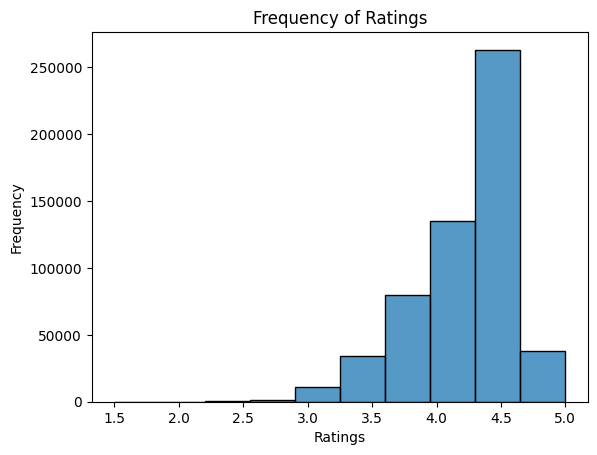

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ratings' is the name of the column in your DataFrame
sns.histplot(data=filtered_df, x='avg_rating', bins=10)  # You can adjust the number of bins as needed
plt.title('Frequency of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


In [81]:
filtered_df.avg_rating.value_counts()

4.4    80251
4.5    71485
4.3    60990
4.2    59779
4.6    50241
4.1    41828
4.0    33774
3.9    24351
4.7    23801
3.8    20700
3.7    19720
3.5    15404
3.6    15142
3.3    10708
4.8     9474
3.4     8301
3.2     4076
4.9     3452
3.1     3366
2.9     1917
3.0     1861
2.8     1043
5.0      883
2.6      210
2.7      130
2.4       69
2.2       58
2.1       58
2.5       44
1.8       37
2.3       26
1.7       18
1.9       12
1.5       12
Name: avg_rating, dtype: int64

In [82]:
# Filter the DataFrame for years 2018 to 2021
filtered_df_year = filtered_df[(filtered_df['year'] >= 2018) & (filtered_df['year'] <= 2021)]

# Create the pivot table with mean ratings
pivot_table = pd.pivot_table(filtered_df_year, values='avg_rating', index='rating', columns='year', aggfunc='mean', fill_value=0)

# Optionally, you can reset the index to make 'rating' a column instead of the index
pivot_table = pivot_table.reset_index()

# Display the pivot table
print(pivot_table)



year  rating      2018      2019      2020      2021
0          1  3.843678  3.847432  3.879815  3.907337
1          2  3.973184  3.966078  4.000802  4.027013
2          3  4.030629  4.036526  4.054744  4.094835
3          4  4.162656  4.161238  4.180215  4.207148
4          5  4.261061  4.262024  4.305763  4.350253


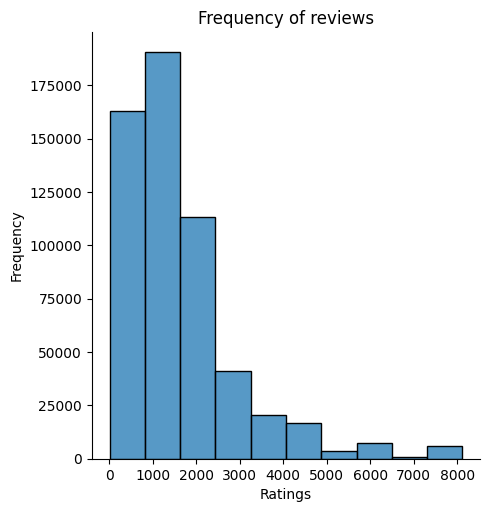

In [83]:
# Assuming 'ratings' is the name of the column in your DataFrame
sns.displot(data=filtered_df, x='num_of_reviews', bins=10)  # You can adjust the number of bins as needed
plt.title('Frequency of reviews')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [84]:
filtered_df.num_of_reviews.value_counts()

8116    3462
38      3310
58      3153
48      2614
848     2597
        ... 
41        13
69        13
22        13
23        13
32         8
Name: num_of_reviews, Length: 878, dtype: int64

In [85]:
filtered_df_year.year.value_counts()

2019    172735
2018    134435
2020    100898
2021     70401
Name: year, dtype: int64

In [68]:
filtered_df.price.value_counts()

₩₩      167758
₩       140866
$       105067
$$       90310
₩₩₩      10797
$$$       3621
₩₩₩₩      3518
$$$$       453
Name: price, dtype: int64

In [69]:
filtered_df.MISC

3696       {'Service options': ['Dine-in', 'Delivery'], '...
3697       {'Service options': ['Dine-in', 'Delivery'], '...
3698       {'Service options': ['Dine-in', 'Delivery'], '...
3699       {'Service options': ['Dine-in', 'Delivery'], '...
3700       {'Service options': ['Dine-in', 'Delivery'], '...
                                 ...                        
2866445    {'Service options': ['Curbside pickup', 'No-co...
2866446    {'Service options': ['Curbside pickup', 'No-co...
2866447    {'Service options': ['Curbside pickup', 'No-co...
2866448    {'Service options': ['Curbside pickup', 'No-co...
2866449    {'Service options': ['Curbside pickup', 'No-co...
Name: MISC, Length: 563221, dtype: object

In [70]:
filtered_df.name_x.value_counts()

A Google User             139
Chris                      88
John                       87
David                      85
J                          84
                         ... 
Shay Ryburn                 1
Benny D                     1
Tim “Hercules19” Wills      1
Rob Montilla                1
Gerardo carrasquero         1
Name: name_x, Length: 295269, dtype: int64

In [ ]:
filtered_df_with_text = filtered_df[filtered_df['text'].notna()]

In [ ]:
filtered_df_with_text.name_x.value_counts()

Bonefish Grill                 585
Sabor Venezolano Kendall       419
Mike's Pizza of Kendall        352
Sokai                          253
McDonald's                     251
Lan Pan-Asian Cafe             214
Amelia's 1931                  203
Burger King                    199
Sakura Sushi Bar               176
Sushi Maki (MIA)               171
Sal's Italian Ristorante       154
Lolo's Surf Cantina            151
Icebox Cafe                    130
Moji African Restaurant         85
Giardino Gourmet Salads         57
Puro Sazon Latino               44
Con Sabor A Cafe                43
La Guira                        23
Taco Bus Miami                  21
The Rickenbacker Restaurant     21
Pizza Italia Miami              16
Express Subs & Pasta            14
Name: name_x, dtype: int64

In [ ]:
filtered_df_with_text.address.nunique()

22

In [15]:
filtered_df.to_parquet("2.florida_points.parquet")